In [1]:
import pandas as pd

In [2]:
#downloaded a csv that contained the data
df = pd.read_csv('emails.csv')

In [3]:
df

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...
...,...,...
517396,zufferli-j/sent_items/95.,Message-ID: <26807948.1075842029936.JavaMail.e...
517397,zufferli-j/sent_items/96.,Message-ID: <25835861.1075842029959.JavaMail.e...
517398,zufferli-j/sent_items/97.,Message-ID: <28979867.1075842029988.JavaMail.e...
517399,zufferli-j/sent_items/98.,Message-ID: <22052556.1075842030013.JavaMail.e...


In [4]:
#checking the contents of one message
df.message[4]

"Message-ID: <30922949.1075863688243.JavaMail.evans@thyme>\nDate: Thu, 31 Aug 2000 05:07:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: greg.piper@enron.com\nSubject: Re: Hello\nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: Greg Piper\nX-cc: \nX-bcc: \nX-Folder: \\Phillip_Allen_Dec2000\\Notes Folders\\'sent mail\nX-Origin: Allen-P\nX-FileName: pallen.nsf\n\nLet's shoot for Tuesday at 11:45.  "

In [5]:
def parse_raw_message(raw_message):
    lines = raw_message.split('\n')
    email = {}
    message = ' '
    keys_to_extract = ['message-id', 'date', 'from', 'to']
    for line in lines:
        if ':' not in line:
            message += line.strip()
            email['body'] = message
        else:
            pairs = line.split(':')
            key = pairs[0].lower()
            val = pairs[1].strip()
            if key in keys_to_extract:
                email[key] = val
    return email

def map_to_list(emails, key):
    results = []
    for email in emails:
        if key not in email:
            results.append(' ')
        else:
            results.append(email[key])
    return results

def parse_into_emails(messages):
    emails = [parse_raw_message(message) for message in messages]
    return {
        'message-id': map_to_list(emails, 'message-id'), 
        'date': map_to_list(emails, 'date'),
        'to_': map_to_list(emails, 'to'), 
        'from_': map_to_list(emails, 'from'),
        'body': map_to_list(emails, 'body')
        }

In [6]:
#cleaning the data step #1 - parse into new column s
email_df = pd.DataFrame(parse_into_emails(df.message))

In [7]:
#viewing examples of the bodies of each e-mail in a df
from pandas import option_context

with option_context('display.max_colwidth', 700):
    display(email_df.loc[220050:220080])

,message-id,date,to_,from_,body
220050,<14359593.1075856608853.JavaMail.evans@thyme>,"Tue, 13 Mar 2001 08","vince.kaminski@enron.com, vasant.shanbhogue@enron.com",bryan.seyfried@enron.com,"when we laast spoke, we agreed that you would look to support some of ourdevelopment efforts from Houston. if possible, i would like to have a quickconference call this week to figure out where we are and move forward.thanks"
220051,<15212839.1075857051239.JavaMail.evans@thyme>,"Fri, 7 Jan 2000 01",Vasant Shanbhogue/HOU/ECT@ECT,katja.schilling@enron.com,"Dear VinceThank you very much for the information.I will get in touch with them today and will keep you informed as to theoutcome.Regards,KatjaVince J KaminskiKatja,RISK magazine has the copyright. You have to contact them to get thepermission to use thisfor external users.Sh?n MillieRisk Books28-29 HaymarketLondon SW1Y 4RXwww.riskpublications.comand discuss the legal aspects with her.VinceVasant ShanbhogueI do not think minor changes would allow you to just use the same file. Youwill have to check with Risk. This is Risk Books, a specialist division ofLondon SW1Y 4RX.Risk Management, Investment and Portfolio Optimisation,"" publishd in 1998. Iam not sure if a lawyer was involved, may..."
220052,<30973036.1075857051261.JavaMail.evans@thyme>,"Mon, 3 Jan 2000 23",Vince J Kaminski/HOU/ECT@ECT,vince.kaminski@enron.com,"Ben,Let me review it one more time from this angle. If you don't hear from me byWednesday,it's OK to post it.VinceBenjamin ParsonsVince,Bijoya is currently working on the development of the website for the newcredit trading initiative, and we thought it would be a good idea to put myrecent technical article ""Measuring Credit Risk"" on it. Are you okay withthis release, or does it contain any proprietary information we should editout?Ben"
220053,<362185.1075857051284.JavaMail.evans@thyme>,"Wed, 22 Dec 1999 09","james.new@enron.com, richard.lewis@enron.com, barry.pearce@enron.com,",anjam.ahmad@enron.com,"amir.ghodsian@enron.com, simon.hastings@enron.com,ali.lloyd@enron.comWe have established a set of power volatility curves down to the EFA/monthlylevel of detail that can be marked to market up to 6 years out. Beyond this,the volatility decays to what we understand to be the long-term level forpower volatility, given our understanding of the behaviour of forward pricesover large time-scales.The swaption traders can now fit the first 5-6 years of the volatility curveto the market-observed baseload swaption implied volatilities (typically 3 to12 months duration for the underlying swap) and then be in a good position toprice other swaptions (including swaptions on individual EFA slots)cons..."
220054,<13900297.1075857051307.JavaMail.evans@thyme>,"Mon, 20 Dec 1999 09",Benjamin Parsons/LON/ECT@ECT,benjamin.parsons@enron.com,"Vince,I've been invited to speak at the conference below in Amsterdam in April.This is along with the Monte Carlo conference a week later which Stinson hasforwarded my name for. Both are by EPRM, and shouldn't take too much time toprepare as will be on similar topics to the previous conference at which Ispoke. Should I go to both, or start prioritising these events?Ben---------------------- Forwarded by Benjamin Parsons/LON/ECT on 20/12/99Enron Capital & Trade Resources Corp.Please respond to ""Angela Adedeji"" <aadedeji@risk.co.uk>Dear BenIt is with great pleasure that I enclose details of EPRM's 3rd annualcongress. I would like to invite you to become involved as a speaker on theprogram..."
220055,<12259853.1075840784817.JavaMail.evans@thyme>,"Wed, 25 Apr 2001 15",Vince J Kaminski/HOU/ECT@ECT,vince.kaminski@enron.com,"vince.kaminski@enron.comvince.kaminski@enron.comAnita,Two weeks I mentioned was just to indicate an approximate duration of the stay.I would leave the final decision to Iris, in coordination with Vasant and Amitava, basedon the business need.One week, with the possibility of extension if necessary is fine.VinceAnita DuPont@ENRONI am making reservation

In [9]:
email_df.drop(email_df.query("body == '' | to_ == '' | from_ == ''").index, inplace=True)

In [10]:
#limiting the corpus to only e-mails sent from employees at Enron (no SPAM)
from_at_enron_dot_com_df = email_df[email_df['from_'].str.contains('@enron.com')]
from_at_enron_dot_com_df

,message-id,date,to_,from_,body
0,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16",tim.belden@enron.com,phillip.allen@enron.com,Here is our forecast
1,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13",john.lavorato@enron.com,phillip.allen@enron.com,Traveling to have a business meeting takes th...
2,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03",leah.arsdall@enron.com,phillip.allen@enron.com,test successful. way to go!!!
3,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06",randall.gay@enron.com,phillip.allen@enron.com,"Randy,Can you send me a schedule of the salar..."
4,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05",greg.piper@enron.com,phillip.allen@enron.com,
...,...,...,...,...,...
517378,<28740402.1075842029506.JavaMail.evans@thyme>,"Thu, 20 Dec 2001 09",stephanie.sever@enron.com,john.zufferli@enron.com,Here is the update list that you requested. M...
517384,<30449512.1075842029649.JavaMail.evans@thyme>,"Wed, 12 Dec 2001 09",astrid.montes@powerpool.ab.ca,john.zufferli@enron.com,Please set up access for the digital certific...
517396,<26807948.1075842029936.JavaMail.evans@thyme>,"Wed, 28 Nov 2001 13",kori.loibl@enron.com,john.zufferli@enron.com,This is a trade with OIL-SPEC-HEDGE-NG (John ...
517397,<25835861.1075842029959.JavaMail.evans@thyme>,"Wed, 28 Nov 2001 12",john.lavorato@enron.com,john.zufferli@enron.com,Some of my position is with the Alberta Term ...


In [16]:
# input - df: a Dataframe, chunkSize: the chunk size
# output - a list of DataFrame
# purpose - splits the DataFrame into smaller chunks
def split_dataframe(df, chunk_size = 25000): 
    chunks = list()
    num_chunks = len(df) // chunk_size + 1
    for i in range(num_chunks):
        chunks.append(df[i*chunk_size:(i+1)*chunk_size])
    return list(chunks)

In [20]:
list_of_dfs = split_dataframe(from_at_enron_dot_com_df, chunk_size=25000)

#I had to do this step in google colab as my PC didn't have enough ram to go through the regex
#Please see the other notebook in the repo

In [98]:
# Text preprocessing steps - remove numbers, captial letters and punctuation
import re
import string

alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

df['body'] = df.body.map(alphanumeric).map(punc_lower)
df.head()

<ipython-input-98-f4c0605a48b4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['body'] = df.body.map(alphanumeric).map(punc_lower)


,message-id,date,to_,from_,body
0,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16",tim.belden@enron.com,phillip.allen@enron.com,here is our forecast
1,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13",john.lavorato@enron.com,phillip.allen@enron.com,traveling to have a business meeting takes th...
2,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03",leah.arsdall@enron.com,phillip.allen@enron.com,test successful way to go
3,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06",randall.gay@enron.com,phillip.allen@enron.com,randy can you send me a schedule of the salar...
4,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05",greg.piper@enron.com,phillip.allen@enron.com,


In [108]:
#viewing a sample to see if the above worked
df_small = df[10000:20000]
df_small

,message-id,date,to_,from_,body
14369,<10978141.1075854626397.JavaMail.evans@thyme>,"Mon, 14 Aug 2000 01",jason.bass2@compaq.com,eric.bass@enron.com,
14370,<27348999.1075854626419.JavaMail.evans@thyme>,"Mon, 14 Aug 2000 01","jason.bass2@compaq.com, phillip.love@enron.com...",eric.bass@enron.com,
14371,<26025537.1075854626440.JavaMail.evans@thyme>,"Mon, 14 Aug 2000 01",lwbthemarine@bigplanet.com,eric.bass@enron.com,
14372,<29181806.1075854626462.JavaMail.evans@thyme>,"Mon, 14 Aug 2000 02","jason.bass2@compaq.com, phillip.love@enron.com...",eric.bass@enron.com,
14373,<27038184.1075854626483.JavaMail.evans@thyme>,"Tue, 15 Aug 2000 01",hrishelp@enron.com,eric.bass@enron.com,
...,...,...,...,...,...
27913,<15652131.1075855825947.JavaMail.evans@thyme>,"Wed, 1 Mar 2000 09",all.worldwide@enron.com,enron.announcements@enron.com,please note the following organizational chan...
27914,<32187572.1075855825983.JavaMail.evans@thyme>,"Wed, 1 Mar 2000 10",patti.thompson@enron.com,sally.beck@enron.com,hotel royal plazai do not plan on checking me...
27915,<11976717.1075855826007.JavaMail.evans@thyme>,"Thu, 2 Mar 2000 02","joe.kishkill@enron.com, michael.guerriero@enro...",kate.agnew@enron.com,michael jones enron commichael jones enron co...
27916,<33201940.1075855826032.JavaMail.evans@thyme>,"Thu, 2 Mar 2000 09","curry@texaco.com, davisrl@texaco.com, ledoujk@...",brenda.herod@enron.com,trevor mihalik enron com robert shiring enron...


In [3]:
# The first document-term matrix has default Count Vectorizer values - counts of unigrams
import nltk
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english', min_df=15, max_df=100000)

body_cv1  = cv1.fit_transform(df.body)

In [6]:
body_cv1

/Users/jamesburns/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<331111x72002 sparse matrix of type '<class 'numpy.int64'>'
	with 21471573 stored elements in Compressed Sparse Row format>

In [17]:
df_vectors = pd.DataFrame.sparse.from_spmatrix(body_cv1)
df_vectors

,0,1,2,3,4,5,6,7,8,9,...,71992,71993,71994,71995,71996,71997,71998,71999,72000,72001
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
331107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
331108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
331109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
import pandas as pd
import pickle as pkl
dtm = pd.read_pickle("./df_vectors.pkl")

/Users/jamesburns/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [27]:
lda_df_vectors = LatentDirichletAllocation(n_components=20, random_state=0)
lda_df_vectors.fit(dtm)

/Users/jamesburns/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0.025     , 0.025     , 0.025     , ..., 0.025     , 0.025     ,
        0.025     ],
       [0.00081967, 0.15468564, 0.69053752, ..., 0.14084242, 0.00081967,
        0.00081967],
       [0.7625    , 0.0125    , 0.0125    , ..., 0.0125    , 0.0125    ,
        0.0125    ],
       ...,
       [0.10572556, 0.00147059, 0.00147059, ..., 0.00147059, 0.00147059,
        0.00147059],
       [0.00555556, 0.00555556, 0.00555556, ..., 0.00555556, 0.00555556,
        0.00555556],
       [0.09700964, 0.005     , 0.005     , ..., 0.005     , 0.005     ,
        0.005     ]])

In [31]:
filename = 'lda_df_vectors.sav'

In [28]:
pkl.dump(lda_df_vectors, open(filename, 'wb'))

/Users/jamesburns/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
lda_df_vectors = pkl.load(open(filename, 'rb'))

In [33]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [7]:
#below isn't working
#pyLDAvis.sklearn.prepare(lda_df_vectors, dtm, cv1)

/Users/jamesburns/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
import numpy as np
words = list(np.asarray(cv1.get_feature_names()))

In [43]:
from corextopic import corextopic as ct
from corextopic import vis_topic as vt

topic_model = ct.Corex(n_hidden=6, words=words, seed=1)
topic_model.fit(body_cv1, words=words, docs=df.body)

In [44]:
#topics according to CorEx
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: john,david,robert,michael,richard,james,lisa,kevin,scott,mike
1: state,energy,power,california,mara,steffes,electricity,shapiro,utilities,kaufman
2: business,market,new,based,year,provide,company,including,management,process
3: time,work,way,like,make,years,good,said,just,think
4: use,information,agreement,need,issue,intended,issues,confidential,mail,contract
5: solberg,slinger,ryan,geir,davis,guzman,mark,pete,harasin,leaf


In [45]:
#top documents that explain the above topics
topic_model.get_top_docs(topic=4, n_docs=2)

[('f y i by holman w  jenkins jr       wall street   copyright  c     dow jones   company  inc  people less in salaries and wages  andcharge less for things in stores now the state of california has seized upon the identical solution for itselectricity woes  by fiat  it has lowered theprice that utilities are legally allowed to pay for bulk electricity  andalso lowered the price they are allowed tocharge for the same electricity to their end users wow  we wish someone had hit upon this approach before  rents too expensive make apartment owners put usup for free  medical bills a nuisance  require doctors and hospitals to workfor nothing almost any inconvenience can  in theory  be solved by passing a lawcompelling others to do what we want  if anystate is well situated to make this its comprehensive approach to governing it s california    being a state in closegeographical proximity to north korea because each year the graduate schools release another class of educatedprofessionals into

In [47]:
# Note, instead of using .predict(doc_word), you can also call topic_model.labels
predictions = pd.DataFrame(topic_model.predict(body_cv1), columns=['topic'+str(i) for i in range(6)])
predictions.head(3)

,topic0,topic1,topic2,topic3,topic4,topic5
0,False,False,False,False,False,False
1,False,False,False,True,False,False
2,False,False,False,False,False,False


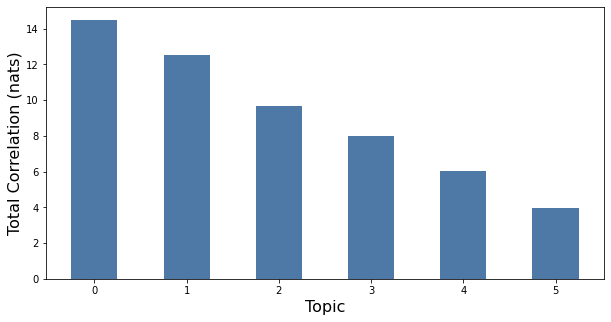

In [49]:
#this was done in google colab.  See the other notebook

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);

In [53]:
topic_model = ct.Corex(n_hidden=7, words=words,
                       max_iter=200, verbose=False, seed=1)

topic_model.fit(body_cv1, words=words, docs=df.body, 
                anchors=[['fraud', 'scared', 'nervous', 'confidential', 
                          'issue'], 
                         ['world', 'international'], 
                         ['images', 'image', 'graphics'], 
                         ['price', 'trade', 'delivery'],
                         ['meeting', 'time', 'deck'], 
                         ['flight','airport', 'hotel'],
                         ['support', 'promotion']], anchor_strength=2)

# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: confidential,issue,agreement,use,intended,privileged,recipient,mail,contract,prohibited
1: market,state,power,energy,world,electricity,california,company,utilities,years
2: gas,based,cost,term,rate,capacity,month,day,deal,used
3: robert,john,david,richard,james,michael,paul,steve,karen,scott
4: time,like,think,make,work,just,meeting,know,way,want
5: greg,paula,brown,andrew,sharon,brenda,walker,christina,cathy,hughes
6: support,business,new,year,provide,information,management,including,process,markets


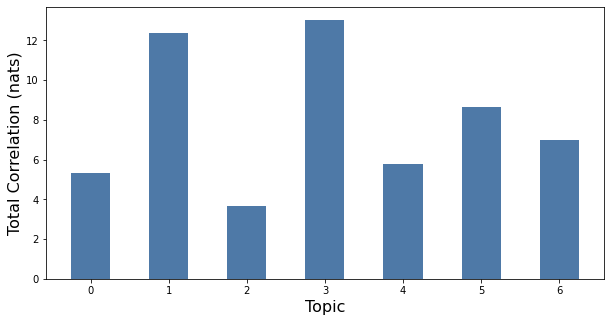

In [54]:
#this was done in google colab.  See the other notebook in the repo

plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);

In [104]:
#exploring results
contain_values = df[df['body'].str.contains('creative accounting')]
contain_values

,message-id,date,to_,from_,body
260208,<27340325.1075840928330.JavaMail.evans@thyme>,"Mon, 12 Nov 2001 07",,courtney.votaw@enron.com,dynegy s enron deal faces major uncertainties...
260213,<430201.1075840931879.JavaMail.evans@thyme>,"Fri, 9 Nov 2001 05",,m..schmidt@enron.com,enron slashes profits since by partn...
260215,<5428447.1075840932062.JavaMail.evans@thyme>,"Thu, 8 Nov 2001 05",,m..schmidt@enron.com,dynegy is in talks on purchasing enron de...
323184,<28337255.1075841146630.JavaMail.evans@thyme>,"Wed, 6 Feb 2002 08",sarah.palmer@enron.com,sarah.palmer@enron.com,skilling to testify thursdaydow jones news se...
323536,<23889631.1075841156703.JavaMail.evans@thyme>,"Thu, 31 Jan 2002 13",sarah.palmer@enron.com,sarah.palmer@enron.com,special edition with businessweek and timethe...
323597,<16250680.1075841160177.JavaMail.evans@thyme>,"Tue, 29 Jan 2002 06",sarah.palmer@enron.com,sarah.palmer@enron.com,enron names stephen f cooper interim ceo and...


In [16]:
#exploring the corpus with spacy
import spacy
from spacy import displacy

nlp = spacy.load('en_core_web_sm')

doc = []
counter = 0
for i in df.body[0:10]:
    doc.append(nlp(i))
    displacy.render(doc[counter], style='dep', options={'distance': 80})
    counter+=1

In [18]:
df_small = df[0:50]
df_small['spacy_doc'] = list(nlp.pipe(df_small.body))
df_small

<ipython-input-18-54fd40ab5dd8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['spacy_doc'] = list(nlp.pipe(df_small.body))


,message-id,date,to_,from_,body,spacy_doc
0,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16",tim.belden@enron.com,phillip.allen@enron.com,here is our forecast,"(here, is, our, forecast)"
1,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13",john.lavorato@enron.com,phillip.allen@enron.com,traveling to have a business meeting takes the...,"(traveling, to, have, a, business, meeting, ta..."
2,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03",leah.arsdall@enron.com,phillip.allen@enron.com,test successful way to go,"(test, successful, , way, to, go, )"
3,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06",randall.gay@enron.com,phillip.allen@enron.com,randy can you send me a schedule of the salary...,"(randy, can, you, send, me, a, schedule, of, t..."
5,<30965995.1075863688265.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 04",greg.piper@enron.com,phillip.allen@enron.com,greg how about either next tuesday or thursday...,"(greg, how, about, either, next, tuesday, or, ..."
6,<16254169.1075863688286.JavaMail.evans@thyme>,"Tue, 22 Aug 2000 07","david.l.johnson@enron.com, john.shafer@enron.com",phillip.allen@enron.com,phillip allen pallen enron com mike grigsby ...,"(phillip, allen, , pallen, enron, com, mike, ..."
8,<20641191.1075855687472.JavaMail.evans@thyme>,"Tue, 17 Oct 2000 02",mark.scott@enron.com,phillip.allen@enron.com,i don t think these are required by the st...,"(i, don, t, think, these, are, required, by, t..."
9,<30795301.1075855687494.JavaMail.evans@thyme>,"Mon, 16 Oct 2000 06","""'Pallen@Enron.com'"" <Pallen@Enron.com>",phillip.allen@enron.com,forwarded by phillip k ...,"( , forwarded, by, phill..."
10,<33076797.1075855687515.JavaMail.evans@thyme>,"Mon, 16 Oct 2000 06",buck.buckner@honeywell.com,phillip.allen@enron.com,mr buckner for delivered gas behind san diego...,"(mr, , buckner, for, delivered, gas, behind, ..."
11,<25459584.1075855687536.JavaMail.evans@thyme>,"Fri, 13 Oct 2000 06",stagecoachmama@hotmail.com,phillip.allen@enron.com,lucy open them and save in the rentroll folder...,"(lucy, open, them, and, save, in, the, rentrol..."


In [16]:
#creating visualizations for slides
import spacy
from spacy import displacy
import os

In [23]:
#creating visualizations for slides
nlp = spacy.load("en_core_web_sm")
doc = nlp("Ask why?")
options = {"compact": True, "bg": "#feaf7b",
           "color": "#ad7697", "font": "Exo 2"}
displacy.render(doc, style="dep",options=options)

In [24]:
#creating visualizations for slides
nlp = spacy.load("en_core_web_sm")
doc = nlp("Ask why, A**HOLE.")
options = {"compact": True, "bg": "#feaf7b",
           "color": "#ad7697", "font": "Exo 2"}
displacy.render(doc, style="dep",options=options)